# Ph21 Assignment 3

In [ ]:
######################################################
#                                                    #
#  Do not commit cache/data files to the repository  #
#                                                    #
######################################################

## Problem 1: Matched Filter Derivation

Solve the following questions in this problem analytically in latex with Jupyter notebook markdown blocks.

---
#### Relevant Background

Recall that the **inner product** of $a(t)$ and $b(t)$ is defined as

$$\langle a|b \rangle = \int_{-\infty}^{\infty} a^*(\tau)b(\tau) d\tau$$

Also recall that the **convolution** of $a(t)$ and $b(t)$ is defined as

$$(a * b)(t) = \int_{-\infty}^{\infty} a(\tau)b(t - \tau) d\tau$$

In a similar way, the **cross-correlation** of $a(t)$ and $b(t)$ is defined as 

$$R_{ab}(t) = \int_{-\infty}^{\infty} a^*(\tau - t)b(\tau) d\tau$$

where the star denotes a complex conjugate. The **auto-correlation** function of $a(t)$ is simply defined as $R_{a}(t) \equiv R_{aa}(t)$. 

**(a)** Show that for real functions, $R_{ab}(t)= a(t) * b(-t)$. If we wanted to implement cross-correlation in practice, what could we do instead?

**(b)** Visually compare the inner product vs cross-correlation defintions. What do you notice? Why is the cross-correlation sometimes called the "sliding inner product"? 

**(c)** Show that the auto-correlation function is hermitian. That is, $R_{a}^*(t) = R_{a}(-t)$.

---

__Your Solution__

*Write your solutions below in latex/markdown (shift enter to display).*


#### (a) Showing that for real functions, 
$$
R_{ab}(t)= a(t) * b(-t)
$$

Recall the definition of the **cross-correlation**
$$
R_{ab}(t) = \int_{-\infty}^{\infty} a^*(\tau-t)b(\tau)d\tau.
$$
For real functions the complex conjugate has no effect, so
$$
R_{ab}(t) = \int_{-\infty}^{\infty} a(\tau-t)b(\tau)d\tau.
$$
Make the substitution 
$$
u=\tau-t\quad\Longrightarrow\quad \tau=u+t,\quad d\tau=du.
$$
Then
$$
R_{ab}(t) = \int_{-\infty}^{\infty} a(u)b(u+t)du.
$$

Now, recall the definition of **convolution**:
$$
(a*b)(t)= \int_{-\infty}^{\infty} a(\tau)b(t-\tau)d\tau.
$$
If we replace $b(t)$ with $b(-t)$, then
$$
(a*b(-t))(t)= \int_{-\infty}^{\infty} a(\tau)b\bigl(-(t-\tau)\bigr)d\tau
= \int_{-\infty}^{\infty} a(\tau)b(\tau-t)d\tau.
$$
Renaming the dummy variable $\tau$ to $u$, we obtain
$$
(a*b(-t))(t)= \int_{-\infty}^{\infty} a(u)b(u-t)du.
$$

Now, note that by the properties of cross-correlation,
$$
R_{ab}(t)= \int_{-\infty}^{\infty} a(u)b(u+t)du 
= \int_{-\infty}^{\infty} b(u)a(u+t)du
= R_{ba}(-t).
$$
Thus, by the commutativity of convolution (when both functions are real) we see that
$$
R_{ab}(t)= a(t)*b(-t).
$$

*Implementing cross-correlation in practice:*  
Rather than writing a separate algorithm for cross-correlation, one can simply time-reverse one of the signals (i.e. form $b(-t)$) and compute the convolution with the other signal. Many numerical libraries provide efficient convolution routines (often using FFTs), so this “sliding inner product” approach is very convenient.

---

#### (b) Comparing the Inner Product and Cross-Correlation

The **inner product** is defined as
$$
\langle a|b \rangle = \int_{-\infty}^{\infty} a^*(\tau)b(\tau)d\tau,
$$
which produces a single number that quantifies the similarity (or “overlap”) between two functions.

The **cross-correlation** is defined as
$$
R_{ab}(t)= \int_{-\infty}^{\infty} a^*(\tau-t)b(\tau)d\tau,
$$
which is a function of the time-shift $t$. For each value of $t$, it computes the inner product between the signal $b(\tau)$ and a shifted (and possibly conjugated) version of $a(\tau)$.

*Visual comparison:*  
- The inner product gives you a single measure of similarity when the two signals are aligned.  
- The cross-correlation “slides” one signal past the other and computes the inner product at each shift.  

---

#### (c) Showing that the Auto-correlation is Hermitian

The **auto-correlation** function is defined as
$$
R_{a}(t) = \int_{-\infty}^{\infty} a^*(\tau-t)a(\tau)d\tau.
$$
We wish to show that
$$
R_{a}^*(t)= R_{a}(-t).
$$

Take the complex conjugate of $R_a(t)$:
$$
R_a^*(t)= \left[\int_{-\infty}^{\infty} a^*(\tau-t)a(\tau)d\tau\right]^*
=\int_{-\infty}^{\infty} \Bigl[a^*(\tau-t)a(\tau)\Bigr]^* d\tau.
$$
Since the complex conjugate of a product is the product of the complex conjugates,
$$
R_a^*(t)= \int_{-\infty}^{\infty} a(\tau-t)a^*(\tau)d\tau.
$$
Now make the substitution
$$
u=\tau-t\quad\Longrightarrow\quad \tau=u+t,\quad d\tau=du.
$$
Then,
$$
R_a^*(t)= \int_{-\infty}^{\infty} a(u)a^*(u+t)du.
$$
Compare this with the definition of the auto-correlation at $-t$:
$$
R_a(-t)= \int_{-\infty}^{\infty} a^*(\tau+ t)a(\tau)d\tau.
$$
Renaming the variable $\tau$ to $u$ gives
$$
R_a(-t)= \int_{-\infty}^{\infty} a^*(u+t)a(u)du.
$$
Taking the complex conjugate inside the integrals (and noting that the integrals are equal since integration is invariant under complex conjugation) shows that
$$
R_a^*(t)= R_a(-t).
$$

Thus, the auto-correlation function is Hermitian.


---
#### Derivation

Matched filters are used extensively in signal analysis, particularly when you have a known signal that you want to find in a very noisy data set. The basic idea behind it is that you compare a template signal to your data $x(t)$ which contains some true signal $s(t)$ and some noise $n(t)$, such that the data you observe is $x(t)=s(t)+n(t)$. To derive how to extract where our template best matches the true signal in the data, we will do some operation on the given data $x(t)$ with some general filter $h(t)$ (called the matched filter), getting a new, convolved output $y(t) = (x*h)(t)$ which somehow distinguishes where the signal is in the data. The way to do this is to choose the filter $h(t)$ that maximizes the signal to noise ratio (and thus is a better fit). 

We will start the derivation by noting that we can split the output into a signal and noise part. Namely, $y(t) = (s*h)(t) + (n*h)(t) \equiv y_s(t) + y_n(t)$.

**(d)** Show that $y_s(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} H(\omega) S(\omega) e^{i\omega t} d\omega$, where $H(\omega)$ and $S(\omega)$ are the Fourier transforms of $h(t)$ and $s(t)$, respectively. Hint: Recall that convolution in the time domain is equivalent to multiplication in the frequency domain.

Now we will consider minimizing the signal to noise ratio (SNR) at some time $t_0$. This is simply the ratio of the power of output that is due to the signal compared to that of the averaged noise. Namely,

$$SNR(t_0) = \frac{|y_s(t_0)|^2}{E\{|y_n(t)|^2\}}$$

Using the Wiener-Khinchin theorem, we can write 

$$E\{|n(t)|^2\} = \frac{1}{2\pi}\int_{-\infty}^{\infty} S_n(\omega) d\omega$$

where $S_n(\omega)$ is the power spectral density of the noise.

**(e)** Using the above expression, rewrite the SNR as 

$$SNR(t_0) = \frac{1}{2\pi} \frac{|\int_{-\infty}^{\infty} H(\omega) S(\omega) e^{i\omega t} d\omega|^2}{\int_{-\infty}^{\infty} |H(\omega)|^2 S_n(\omega) d\omega}$$

Hint: The expectation value here acts only on $n(t)$, not $h(t_0)$.

**(f)** Using the Cauchy-Schwarz inequality $|\langle a|b\rangle|^2 \leq \langle a|a\rangle \langle b|b\rangle$, show that the signal to noise can be given the upper bound

$$SNR(t_0) \leq \frac{1}{2\pi} \int_{-\infty}^{\infty} \frac{|S(\omega)|^2}{S_n(\omega)} d\omega$$

Thus, the $h(t)$ that maximizes the SNR will be the one where the SNR equals this bound. 

**(g)** Show that the upper bound is met if we set $H(\omega) = A e^{i\omega t_0} \frac{S^*(\omega)}{S_n(\omega)}$ for an arbituary constant $A$.

Considering white noise now (i.e. uncorrelated, zero mean noise) and a real signal $s(t)$, we can simplify this to $H(\omega) = e^{i\omega t_0} S(-\omega)$. 

**(h)** Plug this expression for $H(\omega)$ back into $y_s(t)$ and show that $y_s(t) = R_s(t)$ (with a change of variable $t - t_0 \to t$), a simple autocorrelation function.

**(i)** Therefore, show that $y(t) = x(t)*s(-t)$ and thus infer what $h(t)$ equals.

To recap, we found that the filter $h(t)$ required to maximize the signal to noise ratio (SNR; the power of the signal $s(t)$ to the power of the noise $n(t)$ in the observed data) in the convolution of the observed data $x(t)$ with that filter, is simply the time-inversion of the signal we expect to see somewhere in the data. Another way of saying this is that, to extract the location of a template in a dataset, we compute the cross-correlation of the template with that dataset. If we divide this by the noise estimate, we get the signal to noise of our template in the dataset. An observed signal that appears like the template in the dataset will appear as a peak in this SNR plot. You will now apply this with something like `np.correlate` below.

---

__Your Solution__

*Write your solutions below in latex/markdown (shift enter to display).*



---
#### (d) Show that 
$$
y_s(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} H(\omega) S(\omega) e^{i\omega t} d\omega
$$

Since
$$
y_s(t) = (s*h)(t)
$$
and convolution in the time domain corresponds to multiplication in the frequency domain, we have
$$
Y_s(\omega) = H(\omega) S(\omega).
$$
Taking the inverse Fourier transform yields
$$
y_s(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} H(\omega) S(\omega) e^{i\omega t} d\omega.
$$

---

#### (e) Rewrite the SNR

The signal-to-noise ratio at time $t_0$ is defined as
$$
SNR(t_0) = \frac{|y_s(t_0)|^2}{E\{|y_n(t)|^2\}},
$$
with
$$
y_s(t_0) = \frac{1}{2\pi}\int_{-\infty}^{\infty} H(\omega) S(\omega) e^{i\omega t_0} d\omega.
$$
Using the Wiener-Khinchin theorem, the noise power is
$$
E\{|y_n(t)|^2\} = \frac{1}{2\pi}\int_{-\infty}^{\infty} |H(\omega)|^2 S_n(\omega) d\omega,
$$
so that
$$
SNR(t_0) = \frac{1}{2\pi} \frac{\left|\int_{-\infty}^{\infty} H(\omega) S(\omega) e^{i\omega t_0} d\omega\right|^2}{\int_{-\infty}^{\infty} |H(\omega)|^2 S_n(\omega) d\omega}.
$$

---

#### (f) Upper Bound via the Cauchy–Schwarz Inequality

Using the Cauchy–Schwarz inequality
$$
|\langle a|b\rangle|^2 \leq \langle a|a\rangle \langle b|b\rangle,
$$
define
$$
a(\omega) = H(\omega)\sqrt{S_n(\omega)} \quad \text{and} \quad b(\omega) = \frac{S(\omega)e^{i\omega t_0}}{\sqrt{S_n(\omega)}}.
$$
Then,
$$
\int_{-\infty}^{\infty} H(\omega) S(\omega) e^{i\omega t_0} d\omega = \langle a|b \rangle,
$$
and by Cauchy–Schwarz,
$$
\left|\int_{-\infty}^{\infty} H(\omega) S(\omega) e^{i\omega t_0} d\omega\right|^2 \leq \left(\int_{-\infty}^{\infty}|H(\omega)|^2S_n(\omega) d\omega\right) \left(\int_{-\infty}^{\infty}\frac{|S(\omega)|^2}{S_n(\omega)} d\omega\right).
$$
Substitute this inequality into the SNR expression to obtain
$$
SNR(t_0) \leq \frac{1}{2\pi}\int_{-\infty}^{\infty} \frac{|S(\omega)|^2}{S_n(\omega)} d\omega.
$$

---

#### (g) Achieving the Upper Bound

Equality in the Cauchy–Schwarz inequality holds if and only if
$$
a(\omega) \propto b(\omega),
$$
which implies there exists a constant $A$ such that
$$
H(\omega)\sqrt{S_n(\omega)} = A\,\frac{S^*(\omega)e^{-i\omega t_0}}{\sqrt{S_n(\omega)}}.
$$
Solving for $H(\omega)$ gives
$$
H(\omega) = A e^{i\omega t_0} \frac{S^*(\omega)}{S_n(\omega)}.
$$
For white noise (i.e. constant $S_n(\omega)$) and a real signal $s(t)$ (so that $S^*(\omega)=S(-\omega)$), this simplifies to
$$
H(\omega) = e^{i\omega t_0} S(-\omega).
$$

---

#### (h) Showing that $y_s(t) = R_s(t)$

Substitute 
$$
H(\omega) = e^{i\omega t_0} S(-\omega)
$$
into the expression for $y_s(t)$:
$$
y_s(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} e^{i\omega t_0} S(-\omega) S(\omega) e^{i\omega t} d\omega.
$$
Since for a real signal $S(-\omega) = S^*(\omega)$, we have
$$
y_s(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} |S(\omega)|^2 e^{i\omega (t+t_0)} d\omega.
$$
With a change of variable $t-t_0 \to t$, this is the autocorrelation function
$$
R_s(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} |S(\omega)|^2 e^{i\omega t} d\omega.
$$
Thus, $y_s(t) = R_s(t)$.

---

#### (i) Inferring the Matched Filter $h(t)$

Since the overall filtered output is
$$
y(t) = x(t)*h(t)
$$
and we have shown that
$$
y_s(t) = x(t)*s(-t) = R_s(t),
$$
it follows that the matched filter must be
$$
h(t) = s(-t).
$$

---




## Problem 2: Matched Filter Practice

#### In this problem, you will need to do the following:

1. Plot the PSD of a background noise
2. Insert a small signal into the noise and plot the joint PSD
3. Design a way to find the inserted signal in the presence of the noise
4. With a given signal+background sample, try to find a signal with given template
5. (Optional) Explain if the found signal is "real" or not

This assignment encourages you to use the [matched filter](https://en.wikipedia.org/wiki/Matched_filter) technique to find a signal in the presence of noise. This is a very important technique in experimental physics, and it is used in many fields, including particle physics, gravitational wave physics, and many others.

In the previous assignment, we have seen that finding a sinusoidal signal in the presence of noise can be done efficiently using the Fourier Spectrum. However, this method is not optimal when the signal is not a simple sinusoidal wave. In this assignment, we will see how to find a signal in the presence of noise using the matched filter technique.

Consider a signal that is a compressed sinusoidal wave. Here, we create a signal that is a sinusoidal wave with a Gaussian envelope. The background is again a white noise, that is 5 kHz and lasts for ~4ms:

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import h5py as h5
# from scipy import fft
# Add any other libraries you need here

In [3]:
#============== Generate fake background signal - Do not change this cell ==============#

rng = np.random.default_rng(42)

# const def
bkg_len_s, sig_len_s = 10, 0.005
sampling_rate = 44100
sig_ct_freq = 5000
sig_bw = 300
sig_strength = np.sqrt(3)

# white noise background with gaussian dist
bkg_len = bkg_len_s * sampling_rate
sig_len = int(sig_len_s * sampling_rate)
bkg = rng.normal(0, 1, bkg_len)

# gaussian conv in freq domain -> multiplicative gaussian in time domain 
ker_sigma = sampling_rate / sig_bw / (2 * np.pi)
ker_len = int(6 * ker_sigma) * 2 + 1
ker = np.exp(np.arange(-ker_len//2, ker_len//2+1)**2 / (-2 * ker_sigma**2))
ker /= np.sum(ker)

# sinusoidal signal
sig = np.cos(2 * np.pi * sig_ct_freq * np.arange(sig_len)/sampling_rate)

# compress & scale it
ker_sigma = 1/(2*np.pi*sig_bw)
ker = np.exp(-np.linspace(-sig_len_s/2,sig_len_s/2,sig_len)**2/ker_sigma**2/2)
sig *= ker
sig *= sig_strength

#=================== You may add/delete/modify any code cell below =====================#

Have a look at the signal:

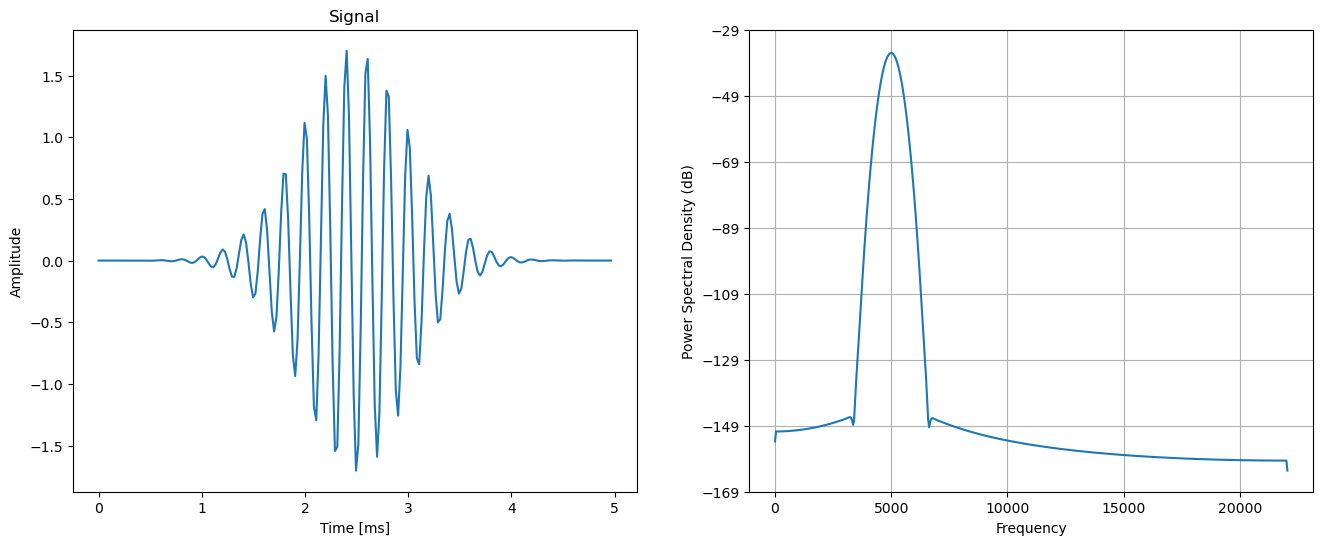

In [4]:
fig,axs = plt.subplots(1,2,figsize=(16,6))
axs: tuple[plt.Axes, plt.Axes] # type: ignore
axs[0].plot(np.arange(sig_len)/sampling_rate*1000, sig)
axs[0].set_title('Signal')
axs[0].set_xlabel('Time [ms]')
axs[0].set_ylabel('Amplitude')
axs[1].psd(sig, NFFT=1024, Fs=sampling_rate, scale_by_freq=False)
plt.show()

#### (2.1) Put the signal in the background noise at any time you like. Then, plot the PSD of the background and the signal+background. Can you spot the signal in the PSD?

##### Do NOT multiply the signal by any factor. Add them in a pure additive way.

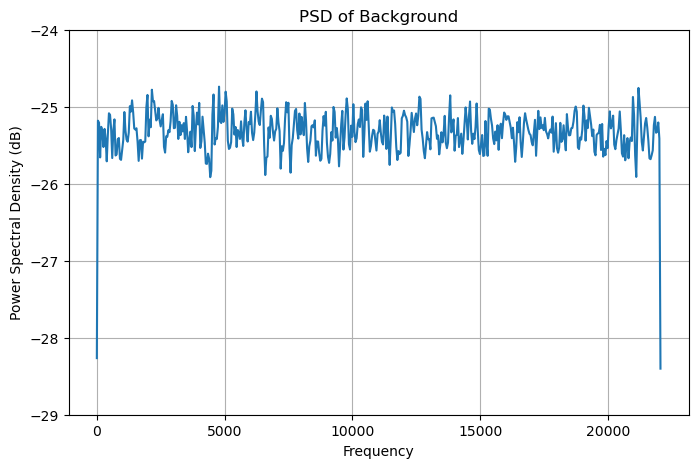

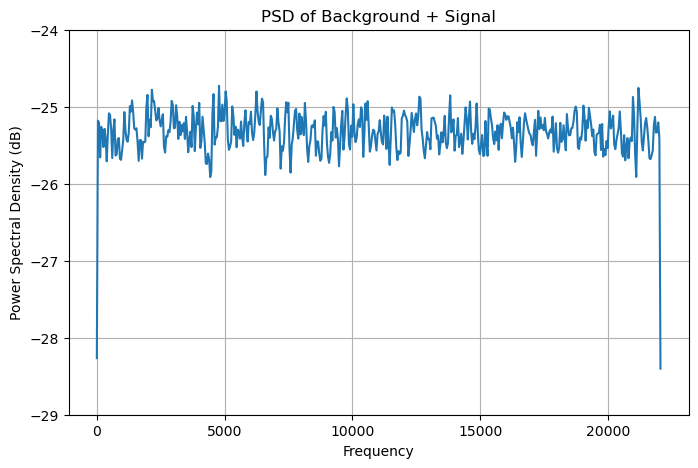

In [ ]:
# Choose a random insertion point 
idx = 100000  

# Copy background and embed the signal
bkg_and_signal = bkg.copy()
bkg_and_signal[idx : idx + sig_len] += sig

# Plot PSD of background alone
plt.figure(figsize=(8,5))
plt.psd(bkg, NFFT=1024, Fs=sampling_rate, scale_by_freq=False)
plt.title("PSD of Background")
plt.show()

# Plot PSD of background + signal
plt.figure(figsize=(8,5))
plt.psd(bkg_and_signal, NFFT=1024, Fs=sampling_rate, scale_by_freq=False)
plt.title("PSD of Background + Signal")
plt.show()



No I can't.

#### (bonus-1) As the signal is t-dependent, how could you find the signal more efficiently? Make another sample with 3x signal amplitude, and spot the signal visually.

hint0: this is only a bonus :)

hint1: you know where to look for it: 5kHz at the time you placed it.

hint2: some parameters may need some finetuning to make it visible.

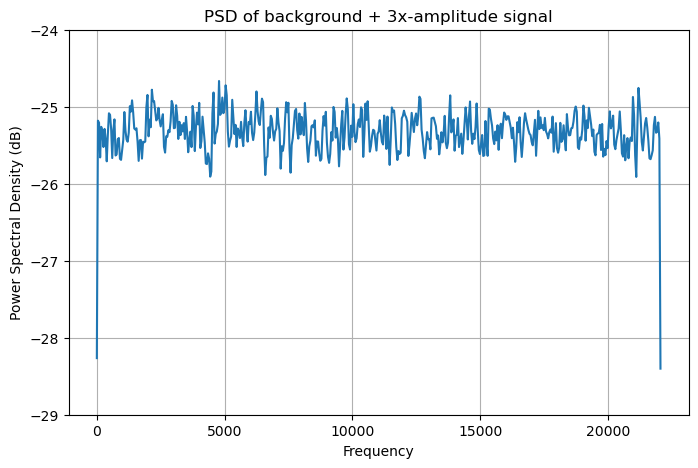

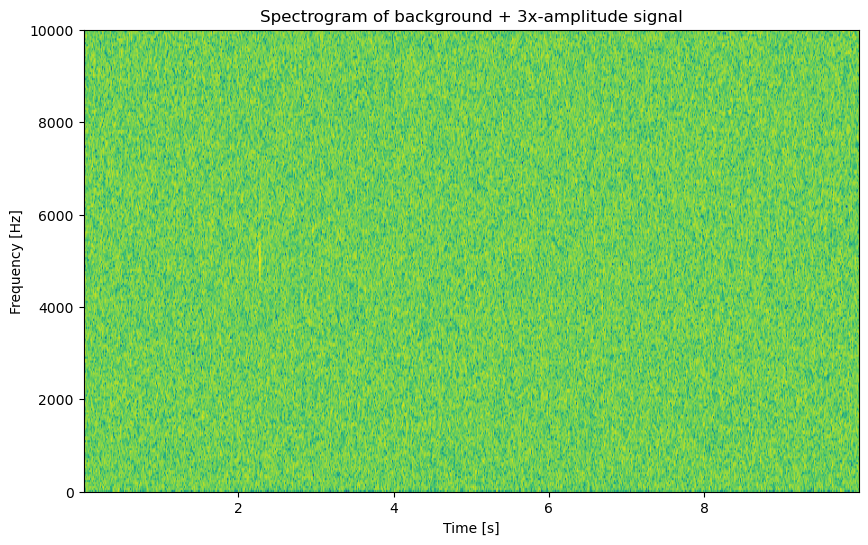

In [ ]:
bkg_and_signal2 = bkg.copy()

idx = 100000  
sig2 = 3 * sig  
bkg_and_signal2[idx : idx + sig_len] += sig2

# Plot PSD of the new sample
plt.figure(figsize=(8,5))
plt.psd(bkg_and_signal2, NFFT=1024, Fs=sampling_rate, scale_by_freq=False)
plt.title("PSD of background + 3x-amplitude signal")
plt.show()

# Plot spectrogram to see time-frequency structure
plt.figure(figsize=(10,6))
plt.specgram(bkg_and_signal2, NFFT=1024, Fs=sampling_rate, noverlap=512, cmap='viridis')
plt.title("Spectrogram of background + 3x-amplitude signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.ylim([0, 10000]) 
plt.show()

we can see a vertical strip around 2.4 s

To find the question signal, we can used the matched filter technique. The matched filter is a filter that maximizes the signal-to-noise ratio (SNR) of a signal with known shape. The matched filter is the cross-correlation of the template signal with the signal+background. You can read more at the [Wikipedia page](https://en.wikipedia.org/wiki/Matched_filter).

To apply the matched filter, in this case, just use the signal as the template, and apply cross-correlation of it with the signal+background.

Remark: The cross-correlation is the convolution of the signal+background with the time-reversed signal. You can do it using the `np.correlate` function, or the `np.convolve` function with signal in the reverse order.

#### (2.2) Using matched filter, find the signal in the signal+background sample in time domain (when is it?).

First, apply the matched filter to the signal+background sample.

Then, estimate the noise in the filtered signal. You can use a part of the filtered data that you know that there is no signal. Take the standard deviation of this part as the noise level.

Finally, plot the SNR of the filtered signal. The SNR is the ratio of the amplitude of the filtered signal to the noise level. What is the SNR for the signal provided?

Remark: depending on the context, SNR can be defined in power density, which is proportional to the square of the amplitude.

Peak index: 100216
Peak SNR (amplitude ratio): 7.45
Signal appears around t = 2.2675 s


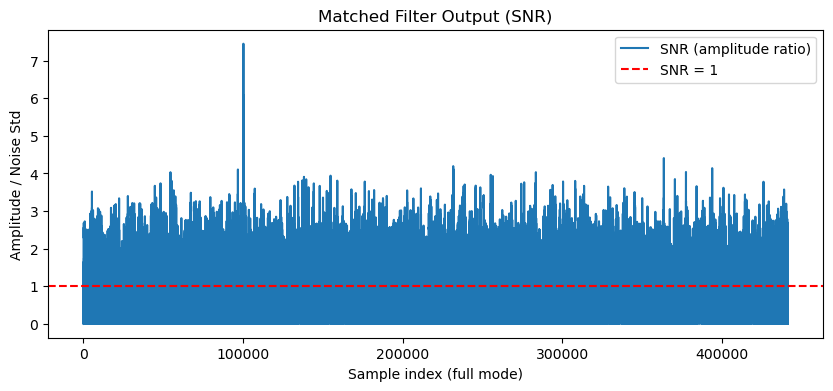

In [ ]:

import numpy as np
import matplotlib.pyplot as plt



# Matched filter via cross-correlation
filtered_output = np.correlate(bkg_and_signal, sig[::-1], mode='full')

# Noise estimation
noise_region = filtered_output[:50000]  
sigma = np.std(noise_region)          

# SNR in amplitude
snr = np.abs(filtered_output) / sigma

# Find maximum SNR and corresponding time index
peak_idx = np.argmax(snr)
peak_snr = snr[peak_idx]

time_peak_s = (peak_idx - (len(sig) - 1)) / sampling_rate

print(f"Peak index: {peak_idx}")
print(f"Peak SNR (amplitude ratio): {peak_snr:.2f}")
print(f"Signal appears around t = {time_peak_s:.4f} s")

# Plot the SNR across the entire cross-correlation
plt.figure(figsize=(10,4))
plt.plot(snr, label='SNR (amplitude ratio)')
plt.axhline(1, color='r', linestyle='--', label='SNR = 1')
plt.title("Matched Filter Output (SNR)")
plt.xlabel("Sample index (full mode)")
plt.ylabel("Amplitude / Noise Std")
plt.legend()
plt.show()



#### (2.3) New let get some real data and try to find a signal in it. Also, in this case, the noise is no longer uniform in frequency domain, and we can do the matched filter in the frequency domain to get a better result.

The data files `data_w_signal.hdf5` contains a time series measured from [LIGO](https://www.wikipedia.org/wiki/LIGO) (Laser Interferometer Gravitational-Wave Observatory). This data is a 4096 Hz time series with 16 seconds of duration. The signal is a chirp, that is a sinusoidal wave with a frequency increasing linearly in time.



For some background on what the signal source is: [Homework from the Last Year](https://github.com/Caltech-ph2x/ph21/files/14132007/assignments_Ph21_Ph21.3_LIGO_Inspiral.pdf).

**Only as a reference, you don't need to do the homework from last year ;)**

In [14]:
with h5.File('./data/data_w_signal.hdf5') as f:
    data = np.array(f['strain/Strain'])
with h5.File('./data/template.hdf5') as f:
    signal_template = np.array(f['strain/Strain'])

sampling_rate = 4096

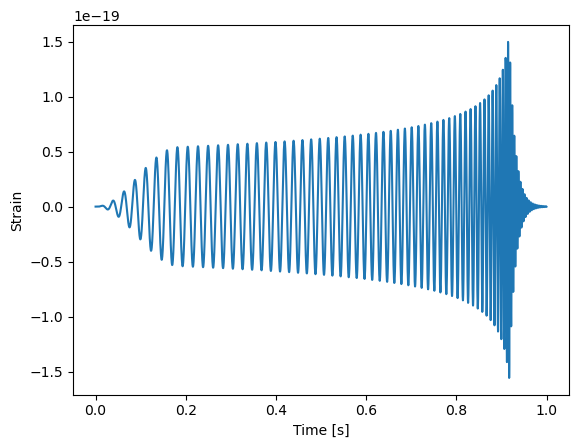

In [15]:
plt.plot(np.arange(len(signal_template))/sampling_rate, signal_template)
plt.xlabel('Time [s]')
plt.ylabel('Strain')
plt.show()

Let's visualize the signal on a spectrogram. The spectrogram is a time-frequency representation of a time series. It is a 2D plot where the x-axis is the time, the y-axis is the frequency, and the color is the power density. You can use the `plt.specgram` function to plot the spectrogram.

As the chirp increases in frequency, you can see a ascending line in the spectrogram. The chirp is the signal we want to find.

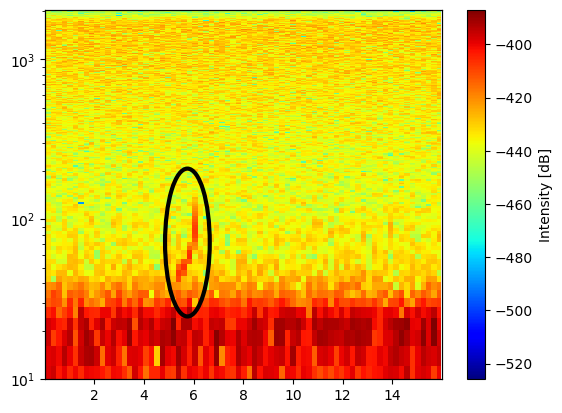

In [16]:
circle = mpl.patches.Ellipse((5.75, 0.37), 1.8,0.4,lw=3, color='k', fill=False) # type: ignore

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.set_yticks(())
ax2.add_patch(circle)
ax1.specgram(data, NFFT=1024, Fs=sampling_rate, label='Data', cmap='jet', mode='psd')
ax1.set_yscale('log')
ax1.set_ylim(10, 2048)
plt.colorbar(label='Intensity [dB]', mappable=ax1.get_children()[0]) # type: ignore
plt.show()

#### (2.3a) Assume there is **no** signal presenting in **first 5-seconds** of the data. With the time-domain matched filter method we have just done, plot the SNR of the filtered signal. What is the SNR obtained this way?

#### After plotting out the SNR, do you see any other signal-like feature? (Other than the one around t=6s)

(2.3a) Time-domain matched filter results:
 - Noise standard deviation (first 5s) = 3.45e-38
 - Max SNR = 10.21 at t = 4.626 s


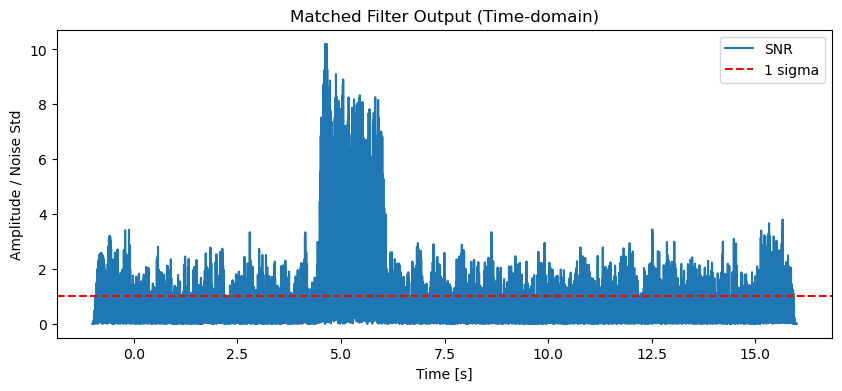

Other signal-like peaks above 3.0 sigma found at times (s):
[-0.59741211 -0.59716797 -0.59692383 ... 15.65771484 15.65795898
 15.65820312]


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import h5py as h5



# Load data
with h5.File('./data/data_w_signal.hdf5') as f:
    data = np.array(f['strain/Strain'])

with h5.File('./data/template.hdf5') as f:
    signal_template = np.array(f['strain/Strain'])

sampling_rate = 4096
time_data = np.arange(len(data)) / sampling_rate

# Matched filter via cross-correlation
filtered_output = np.correlate(data, signal_template[::-1], mode='full')


noise_samples = int(5 * sampling_rate)
noise_region = filtered_output[:noise_samples]
noise_std = np.std(noise_region)

#  Compute SNR in amplitude form
snr_full = np.abs(filtered_output) / noise_std

# Create a time axis for the cross-correlation
corr_len = len(filtered_output)
time_axis = (np.arange(corr_len) - (len(signal_template) - 1)) / sampling_rate

# Find the maximum SNR and convert index to time
peak_idx = np.argmax(snr_full)
peak_snr = snr_full[peak_idx]
peak_time_s = time_axis[peak_idx]

print(f"(2.3a) Time-domain matched filter results:")
print(f" - Noise standard deviation (first 5s) = {noise_std:.3g}")
print(f" - Max SNR = {peak_snr:.2f} at t = {peak_time_s:.3f} s")

# Plot SNR vs. time
plt.figure(figsize=(10,4))
plt.plot(time_axis, snr_full, label='SNR')
plt.axhline(1.0, color='red', ls='--', label='1 sigma')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude / Noise Std")
plt.title("Matched Filter Output (Time-domain)")
plt.legend()
plt.show()


threshold = 3.0
other_signal_indices = np.where(snr_full > threshold)[0]
other_signal_times = time_axis[other_signal_indices]

# Exclude the main peak time from the search
near_main_peak = np.abs(other_signal_times - peak_time_s) < 0.5
secondary_times = other_signal_times[~near_main_peak]

if len(secondary_times) > 0:
    print(f"Other signal-like peaks above {threshold} sigma found at times (s):")
    print(secondary_times)
else:
    print(f"No other peaks above {threshold} sigma apart from the main event.")


In [21]:
np.max(np.abs(r)/sigma), np.max(np.abs(r[-3*4096:])/sigma)

# There is a signal-like feature at round 13.5s.
# SNRs for the two signal-like features are as shown.

NameError: name 'r' is not defined

#### (2.3b) Now, make a psd of the background region (first 5s of data). Use 4096 frequency bins, estimate the noise power for each frequency bin and plot the PSD.

Hint: `plt.psd` is a useful function that will plot the psd, and returns the power density and the frequency bins, with Welch's method applied. It can be very useful for this task.

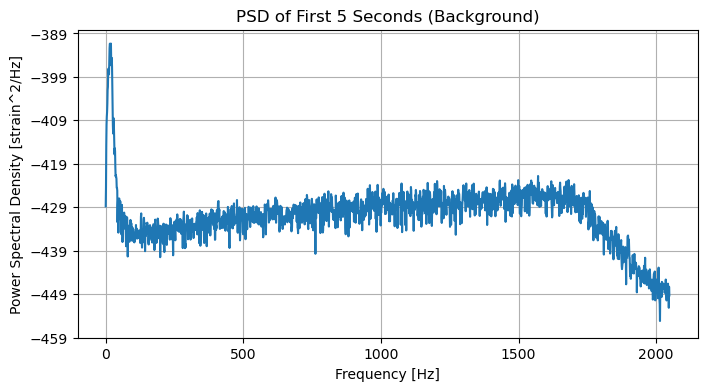

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import h5py as h5



with h5.File('./data/data_w_signal.hdf5','r') as f:
    data = np.array(f['strain/Strain'])

sampling_rate = 4096

# Extract the first 5 seconds as "background"
five_seconds = int(5 * sampling_rate)
bkg_region = data[:five_seconds]

# Plot the PSD of this background region.

plt.figure(figsize=(8,4))
Pxx, freqs = plt.psd(
    bkg_region,
    NFFT=4096,
    Fs=sampling_rate,
    scale_by_freq=False,  
    window=np.hanning(4096)  
)

plt.title("PSD of First 5 Seconds (Background)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power Spectral Density [strain^2/Hz]")
plt.show()




Apply the "optimal matched filter" mentioned in https://gwosc.org/tutorial_optimal/ :

1. Pad the signal template with zero entries at the end to match the length of the data
    - Think: why?
2. Take FFT of the padded template $F[S]$ signal and the data $F[D]$
3. Multiply the FFT of the data by the complex conjugate of the FFT of the template, then divide the product by the PSD of the background noise's power spectrum $P_{\rm noise}$: evaluate $F[S]F[D]^*/P_{\rm noise}$
    - The number of bins is different for the spectrums of the data, signal template and power. Use `np.interp` to interpolate the power spectrum to the same frequency bins as the signal template and data.
    - Be careful: np.fft.fft outputs frequency from -f_s/2 to f_s/2, and the PSD is only with positive frequency.
4. Take the inverse FFT of the result. This is the optimal matched filter output in the time domain.
5. Normalize the result again by the standard deviation of the noise, the same as what we did in the time domain matched filter.


Hint: you can refer to the solution in the tutorial for this question.

**************************

If you feel like it, let'ss do this step by step.
First, pad the signal template with trailing zeros, and, get the FFT for the signal template and the data. You may use `np.concatenate` with `np.zeros` to pad the signal template, and `numpy` or `scipy` to compute the FFT.

In either case, get the corresponding frequencies for the FFT outputs, as we will need them to interpolate the PSD.

In [ ]:

import numpy as np
import h5py as h5

fs = 4096  

# Load data and template
with h5.File('./data/data_w_signal.hdf5', 'r') as f:
    data = f['strain/Strain'][...]   

with h5.File('./data/template.hdf5','r') as f:
    template = f['strain/Strain'][...]


N = len(data)           
pad_len = N - len(template)
if pad_len < 0:
    raise ValueError("Template is longer than data—cannot pad only with zeros at the end.")

# Zero-pad the template
template_padded = np.concatenate([template, np.zeros(pad_len)])

# FFT of data and padded template
data_fft = np.fft.fft(data)
template_fft = np.fft.fft(template_padded)

# Frequencies for the FFT bins (two-sided)
freq_data = np.fft.fftfreq(N, d=1.0/fs)

print("Lengths:",
      f"data={N}, template={len(template)}, padded={len(template_padded)}")
print("FFT shapes:",
      f"data_fft={data_fft.shape}, template_fft={template_fft.shape}")
print("freq_data range ~ [%.1f, %.1f]" % (freq_data.min(), freq_data.max()))





Lengths: data=65536, template=4096, padded=65536
FFT shapes: data_fft=(65536,), template_fft=(65536,)
freq_data range ~ [-2048.0, 2047.9]


With `np.interp`, interpolate the PSD to the same frequency bins as the signal template and data.
- Be careful on the frequency range of the PSD and the FFT outputs. Are they the same?

Original one-sided PSD shapes: (2049,) (2049,)
Interpolated PSD shape: (65536,)
FFT freq range: -2048.0 to 2047.9375


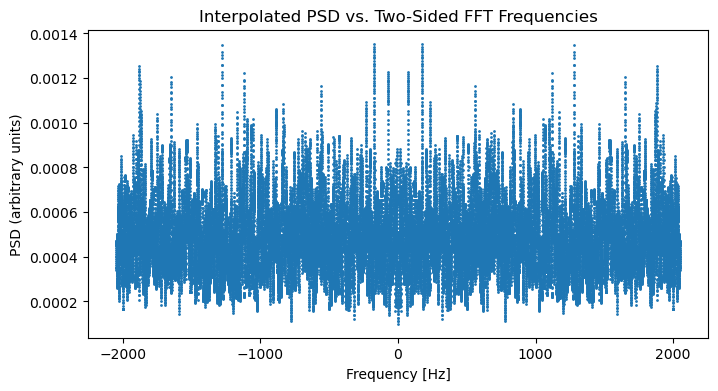

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 4096  


N = fs * 16
data = np.random.randn(N)  


plt.figure()
psd_vals, freq_psd = plt.psd(
    data[N//2:],       # e.g. last half for "background"
    Fs=fs,
    NFFT=fs,
    visible=False
)
plt.close()


# Get the FFT of the entire data, which is two-sided
data_fft = np.fft.fft(data)
freq_data = np.fft.fftfreq(N, d=1./fs)  

abs_freq = np.abs(freq_data)

psd_interp = np.interp(
    abs_freq,     
    freq_psd,      
    psd_vals,      
    left=psd_vals[0],
    right=psd_vals[-1]
)

print("Original one-sided PSD shapes:", psd_vals.shape, freq_psd.shape)
print("Interpolated PSD shape:", psd_interp.shape)
print("FFT freq range:", freq_data.min(), "to", freq_data.max())

# STEP D: Plot the two-sided freq_data vs. the interpolated PSD
plt.figure(figsize=(8,4))
plt.plot(freq_data, psd_interp, '.', markersize=2)
plt.title("Interpolated PSD vs. Two-Sided FFT Frequencies")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD (arbitrary units)")
plt.show()



- **One‐sided PSD**: Functions like `plt.psd` or Welch’s method generally return **positive frequencies** from 0 up to \(f_s/2\).
- **FFT Frequencies**: `np.fft.fftfreq(N, d=1/fs)` spans from \(-f_s/2\) to \(+f_s/2\) (the “two‐sided” spectrum).
so they re not the same

Evaluate $F[S]F[D]^*/P_{\rm noise}$. This is the raw output of the optimal matched filter as defined in the tutorial.


In [ ]:
#  Raw optimal filter output in frequency domain
optimal_freq = data_fft * template_fft.conjugate() / psd_interp

print("optimal_freq shape:", optimal_freq.shape)



optimal_freq shape: (65536,)


Evaluate the background noise level in the filtered results with the same method as in the time domain matched filter: take the first 5-second as background region, take the standard deviation, and divide the results by it, then take absolute value to get the SNR.

In [ ]:
optimal_time = np.fft.ifft(optimal_freq)

# Estimate noise from first 5 seconds
noise_region = optimal_time[:int(5*fs)]
noise_std = np.std(noise_region)


# SNR = |optimal_time| / noise_std
snr_optimal = np.abs(optimal_time) / noise_std




3.159051461910307e-38
Peak SNR = 78.23, at t = 5.230 s


Plot the obtained SNR. What is the SNR obtained this way? Is it better than the time domain matched filter?

Peak SNR = 78.23, at t = 5.230 s


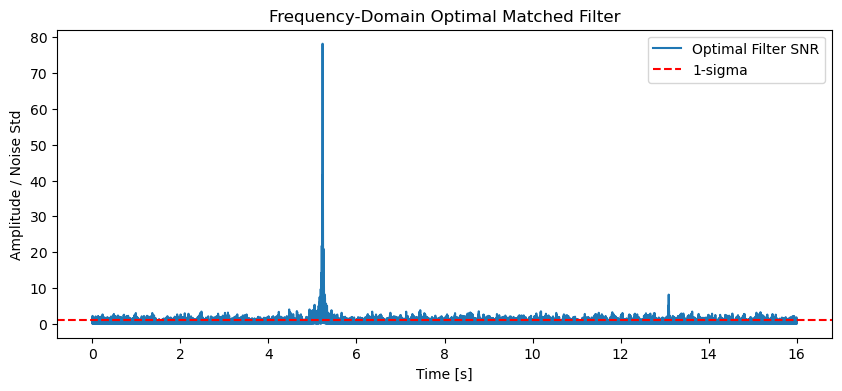

In [49]:
#Plot the frequency-domain matched filter SNR

peak_idx = np.argmax(snr_optimal)
peak_snr = snr_optimal[peak_idx]
peak_time = peak_idx / fs

print(f"Peak SNR = {peak_snr:.2f}, at t = {peak_time:.3f} s")
time_vec = np.arange(len(snr_optimal)) / fs

plt.figure(figsize=(10,4))
plt.plot(time_vec, snr_optimal, label="Optimal Filter SNR")
plt.axhline(1.0, color='r', ls='--', label="1-sigma")
plt.title("Frequency-Domain Optimal Matched Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude / Noise Std")
plt.legend()
plt.show()





That s way better because the PSD Weighing applied and the optimal matched filter is shwoing much clearer results and the peaks are much clearer and the whole distribution is not as uniform as it was revealing the strong signal at the corresponding times.

Remark: results of the optimal matched filter here may be sensitive to the estimated background PSD. In this particular case, changing the way PSD is computed (e.g., method, window, overlap, # of bins) may change the result.

#### (2.4-optional) How would you say if the signal(s) you found in 4-1 and 4-2 are "real" or not?